## Classificação de Gatos e Cachorros com CNN

In [1]:
# Fonte Original
# https://www.kaggle.com/ruchibahl18/cats-vs-dogs-basic-cnn-tutorial

### Install

In [2]:
#!pip install tensorflow --user

In [3]:
#!pip install opencv-python --user

### Imports

In [4]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

### Imagem ilustrativa

In [5]:
# display simples de uma imagem de uma url
url_img = 'https://storage.googleapis.com/kaggle-competitions/kaggle/3362/media/woof_meow.jpg'
Image(url=url_img)

### Leitura do conjunto de dados

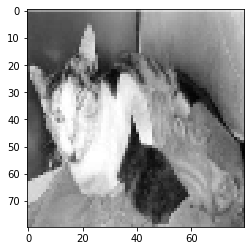

Rotulo: cat
***


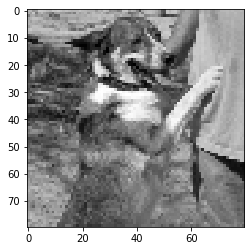

Rotulo: dog
***


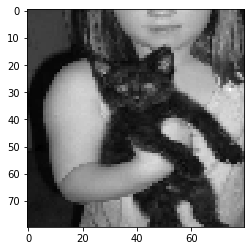

Rotulo: cat
***


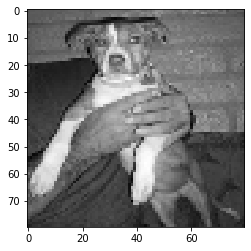

Rotulo: dog
***


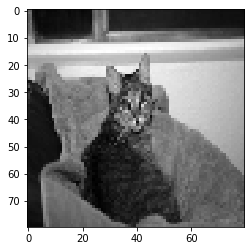

Rotulo: cat
***


In [6]:
main_dir = "dogs-vs-cats"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

show = 5
for index, p in enumerate(os.listdir(path)):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    plt.show()
    print ('Rotulo:', category)
    
    print ('***')
    
    index+=1
    if (index==show):
        break

In [7]:
# Arbitrariamente transforma Cachorro (Dog) em 1, e Gato (Cat) em 0

X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)

In [8]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

### Normalização dos dados

In [9]:
#(valor - min) / (max - min)

In [10]:
# OBS: É equivalente à normalização que coloca entre 0 e 1 que vimos em aula!
X = X/255.0

### Modelo de Redes Neurais

In [11]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
# Resumo do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1327168   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

### Fit do modelo

In [13]:
num_epocas_valor = 1
batch_size_valor = 32

model.fit(X, y,
          epochs=num_epocas_valor,
          batch_size=batch_size_valor,
          validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
20000/20000 [==============================] - 237s 12ms/sample - loss: 0.6298 - accuracy: 0.6375 - val_loss: 0.5594 - val_accuracy: 0.7162


### Leitura do conjunto de teste

In [14]:
test_dir = "test1"
path = os.path.join(main_dir,test_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)

create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

### Predict

In [15]:
predictions = model.predict(X_test)

In [16]:
predicted_val = [int(round(p[0])) for p in predictions]

In [17]:
predicted_val[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

### Salva predições em um CSV

In [18]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})
submission_df.to_csv("submission.csv", index=False)

In [19]:
submission_df.head(10)

,id,label
0,4657,0
1,1185,0
2,11595,0
3,7438,0
4,4055,0
5,2480,0
6,9588,0
7,1226,0
8,9516,1
9,11722,0


In [20]:
submission_df.shape

(12500, 2)

### Predição de um exemplo aleatorio

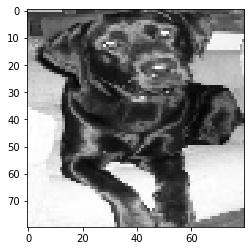

Predição: Dog


In [21]:
# pega uma linha aleatoria
linha_aleatoria_teste = submission_df.sample(1)

id_aleatorio = linha_aleatoria_teste['id']
predicao_linha = int(linha_aleatoria_teste['label'].values[0])

path_img = linha_aleatoria_teste['id'].values[0] + '.jpg'
img_array = cv2.imread(os.path.join(path, path_img) ,cv2.IMREAD_GRAYSCALE)

new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(new_img_array,cmap="gray")
plt.show()

if (predicao_linha == 1):
    pred = 'Dog'
else:
    pred = 'Cat'
      
print ('Predição:', pred)

### Desafios

In [22]:
## Desafio 1: Matriz de confusão para os dados de Treino
## Desafio 2: Tentar melhorar os resultados do modelo